In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import numpy as np
import pandas as pd
import astropy
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.cosmology import Planck18 as cosmo
from astropy.io import fits
from astropy.table import Table

plt.rcParams['text.usetex']= True
plt.rcParams['mathtext.fontset']= 'custom'
plt.rcParams['mathtext.default']= 'rm'
plt.rcParams['axes.formatter.use_mathtext']=False

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Loading in JWST CEERS NIRSpec sample

In [4]:
NIRSpec_sample_df = pd.read_csv('sample_Balmer.csv')
NIRSpec_sample_df

,ID,REDSHIFT,H-ALPHA INTEGRATED LUMINOSITY,H-ALPHA INTEGRATED LUMINOSITY MEAN ERROR,H-ALPHA INTEGRATED LUMINOSITY 16% ERROR,H-ALPHA INTEGRATED LUMINOSITY 84% ERROR,H-BETA INTEGRATED LUMINOSITY,H-BETA INTEGRATED LUMINOSITY MEAN ERROR,H-BETA INTEGRATED LUMINOSITY 16% ERROR,H-BETA INTEGRATED LUMINOSITY 84% ERROR,H-ALPHA INTEGRATED FLUX,H-ALPHA INTEGRATED FLUX MEAN ERROR,H-ALPHA INTEGRATED FLUX 16% ERROR,H-ALPHA INTEGRATED FLUX 84% ERROR,H-BETA INTEGRATED FLUX,H-BETA INTEGRATED FLUX MEAN ERROR,H-BETA INTEGRATED FLUX 16% ERROR,H-BETA INTEGRATED FLUX 84% ERROR
0,323,5.667781,2.590378e+42,2.012511e+41,6.623902e+41,8.483472e+41,1.152682e+42,3.032117e+39,8.083432e+40,8.399957e+40,7.106306e-18,5.521016e-19,1.817166e-18,2.327311e-18,3.162208e-18,8.318148e-21,2.217566e-19,2.304400e-19
1,355,6.100327,2.227345e+42,2.334405e+39,1.190380e+41,1.150471e+41,6.915973e+41,1.608721e+39,7.122139e+40,7.016355e+40,5.150018e-18,5.397559e-21,2.752371e-19,2.660095e-19,1.599096e-18,3.719649e-21,1.646765e-19,1.622306e-19
2,381,5.505045,1.216074e+42,3.209706e+39,1.076674e+41,1.127209e+41,8.614089e+40,1.311409e+40,4.704416e+40,7.231495e+40,3.570494e-18,9.423958e-21,3.161203e-19,3.309578e-19,2.529167e-19,3.850405e-20,1.381255e-19,2.123226e-19
3,386,6.612528,1.241948e+42,4.426539e+39,1.435680e+41,1.515168e+41,2.770874e+41,2.620224e+40,1.240500e+41,1.756645e+41,2.382386e-18,8.491280e-21,2.754017e-19,2.906495e-19,5.315274e-19,5.026288e-20,2.379610e-19,3.369712e-19
4,397,6.000576,1.080890e+43,1.538812e+39,2.141968e+41,2.112040e+41,3.908151e+42,7.856717e+38,1.299206e+41,1.300456e+41,2.596735e-17,3.696847e-21,5.145871e-19,5.073972e-19,9.388957e-18,1.887501e-21,3.121217e-19,3.124219e-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,29756,1.239912,3.028216e+40,1.257250e+38,4.056832e+39,4.150702e+39,8.770802e+39,7.995087e+38,3.182483e+39,4.482350e+39,3.229312e-18,1.340741e-20,4.326236e-19,4.426340e-19,9.353249e-19,8.526022e-20,3.393824e-19,4.780012e-19
124,31057,1.621038,8.263794e+40,9.023853e+37,5.289918e+39,5.461673e+39,2.860636e+40,1.227927e+39,9.430322e+39,1.134240e+40,4.555514e-18,4.974505e-21,2.916130e-19,3.010812e-19,1.576959e-18,6.769095e-20,5.198577e-19,6.252634e-19
125,31075,1.283137,3.276332e+41,6.945467e+38,1.099033e+40,1.047340e+40,1.098853e+41,2.347219e+38,7.169133e+39,7.109135e+39,3.210839e-17,6.806629e-20,1.077064e-18,1.026404e-18,1.076887e-17,2.300299e-20,7.025824e-19,6.967026e-19
126,36119,1.911995,5.507181e+40,3.390945e+39,1.479400e+40,1.797803e+40,3.073228e+40,5.167619e+38,9.936566e+39,1.089619e+40,2.025888e-18,1.247403e-19,5.442165e-19,6.613450e-19,1.130527e-18,1.900975e-20,3.655294e-19,4.008304e-19


### Retrieving RA and DEC of JWST CEERS sample from NIRSpec catalog

In [6]:
# collecting all JWST CEERS mgrat source information
hdu = fits.open('../data/NIRSpec_Master_Catalog_V1.fits')

NIRSpec_catalog = pd.DataFrame()
NIRSpec_catalog['ID'] = list(hdu[1].data['MSA_ID']) # string ids
NIRSpec_catalog['RA'] = list(hdu[1].data['RA'])
NIRSpec_catalog['DEC'] = list(hdu[1].data['DEC'])

NIRSpec_catalog = NIRSpec_catalog.iloc[0:1330]                    # found some IDs had letters (e.g. ID = 'D01'), removing for now (can't convert to int)
NIRSpec_catalog['ID'] = NIRSpec_catalog['ID'].values.astype(int)  # converting string ids to integer
NIRSpec_catalog.sort_values(by=['ID'],inplace=True)               # sorting by integer ids

subset_mask = np.isin(NIRSpec_catalog['ID'].values, NIRSpec_sample_df['ID'].values)
ID_NIRSpec = NIRSpec_catalog['ID'][subset_mask]
RA_NIRSpec = NIRSpec_catalog['RA'][subset_mask]
DEC_NIRSpec = NIRSpec_catalog['DEC'][subset_mask]

# updating table with source information
NIRSpec_sample_df.insert(2, 'RA', RA_NIRSpec.values)
NIRSpec_sample_df.insert(3, 'DEC', DEC_NIRSpec.values)
NIRSpec_sample_df.head()

,ID,REDSHIFT,RA,DEC,H-ALPHA INTEGRATED LUMINOSITY,H-ALPHA INTEGRATED LUMINOSITY MEAN ERROR,H-ALPHA INTEGRATED LUMINOSITY 16% ERROR,H-ALPHA INTEGRATED LUMINOSITY 84% ERROR,H-BETA INTEGRATED LUMINOSITY,H-BETA INTEGRATED LUMINOSITY MEAN ERROR,H-BETA INTEGRATED LUMINOSITY 16% ERROR,H-BETA INTEGRATED LUMINOSITY 84% ERROR,H-ALPHA INTEGRATED FLUX,H-ALPHA INTEGRATED FLUX MEAN ERROR,H-ALPHA INTEGRATED FLUX 16% ERROR,H-ALPHA INTEGRATED FLUX 84% ERROR,H-BETA INTEGRATED FLUX,H-BETA INTEGRATED FLUX MEAN ERROR,H-BETA INTEGRATED FLUX 16% ERROR,H-BETA INTEGRATED FLUX 84% ERROR
0,323,5.667781,214.872556,52.875949,2.590378e+42,2.012511e+41,6.623902e+41,8.483472e+41,1.152682e+42,3.032117e+39,8.083432e+40,8.399957e+40,7.106306e-18,5.521016e-19,1.817166e-18,2.327311e-18,3.162208e-18,8.318148e-21,2.217566e-19,2.304400e-19
1,355,6.100327,214.806482,52.878827,2.227345e+42,2.334405e+39,1.190380e+41,1.150471e+41,6.915973e+41,1.608721e+39,7.122139e+40,7.016355e+40,5.150018e-18,5.397559e-21,2.752371e-19,2.660095e-19,1.599096e-18,3.719649e-21,1.646765e-19,1.622306e-19
2,381,5.505045,214.819671,52.879755,1.216074e+42,3.209706e+39,1.076674e+41,1.127209e+41,8.614089e+40,1.311409e+40,4.704416e+40,7.231495e+40,3.570494e-18,9.423958e-21,3.161203e-19,3.309578e-19,2.529167e-19,3.850405e-20,1.381255e-19,2.123226e-19
3,386,6.612528,214.832184,52.885083,1.241948e+42,4.426539e+39,1.435680e+41,1.515168e+41,2.770874e+41,2.620224e+40,1.240500e+41,1.756645e+41,2.382386e-18,8.491280e-21,2.754017e-19,2.906495e-19,5.315274e-19,5.026288e-20,2.379610e-19,3.369712e-19
4,397,6.000576,214.836197,52.882693,1.080890e+43,1.538812e+39,2.141968e+41,2.112040e+41,3.908151e+42,7.856717e+38,1.299206e+41,1.300456e+41,2.596735e-17,3.696847e-21,5.145871e-19,5.073972e-19,9.388957e-18,1.887501e-21,3.121217e-19,3.124219e-19


### Loading in UNICORN and CANDLES catalogs for UV continuum measurement

In [8]:
# Read in UNICORN photom fits
path = '../data/ceers_unicorn_v0.2/unicorn_photom_v0.2.fits'
hdu = fits.open(path)

UNICORN_catalog_df = pd.DataFrame()
UNICORN_catalog_df['ID'] = list(hdu[1].data['ID'])
UNICORN_catalog_df['RA'] = list(hdu[1].data['RA'])
UNICORN_catalog_df['DEC'] = list(hdu[1].data['DEC'])
UNICORN_catalog_df['FLUX_F606W'] = list(hdu[1].data['FLUX_F606W'])
UNICORN_catalog_df['FLUXERR_F606W'] = list(hdu[1].data['FLUXERR_F606W'])
UNICORN_catalog_df['FLUX_F814W'] = list(hdu[1].data['FLUX_F814W'])
UNICORN_catalog_df['FLUXERR_F814W'] = list(hdu[1].data['FLUXERR_F814W'])
#UNICORN_catalog_df['FLUX_F105W'] = list(hdu[1].data['FLUX_F105W'])        # replaced this filter with F115W since it had few observations for my sources
#UNICORN_catalog_df['FLUXERR_F105W'] = list(hdu[1].data['FLUXERR_F105W'])
UNICORN_catalog_df['FLUX_F115W'] = list(hdu[1].data['FLUX_F115W'])
UNICORN_catalog_df['FLUXERR_F115W'] = list(hdu[1].data['FLUXERR_F115W'])
print(len(UNICORN_catalog_df),'UNICORN sources')
UNICORN_catalog_df.head()

117826 UNICORN sources


,ID,RA,DEC,FLUX_F606W,FLUXERR_F606W,FLUX_F814W,FLUXERR_F814W,FLUX_F115W,FLUXERR_F115W
0,2,215.041222,52.862902,20.548856,5.866910,34.494490,6.131920,27.894344,3.207929
1,3,214.762802,52.851285,2.771436,6.889670,-7.021724,9.272073,24.389004,4.553465
2,4,214.739379,52.834444,55.680813,11.770027,117.296006,15.396663,447.856474,8.134844
3,5,214.743284,52.837322,36.476887,7.171575,46.002122,10.687172,69.588340,4.573144
4,6,214.737044,52.832765,256.907990,8.902350,420.612059,11.604330,495.142735,6.751871


In [9]:
# hdu[1].header

In [11]:
# Read in CANDLES photom fits
path = '../data/EGS_CANDLES.fits'
hdu = fits.open(path)

CANDLES_catalog_df = pd.DataFrame()
CANDLES_catalog_df['ID'] = list(hdu[1].data['ID'][0])
CANDLES_catalog_df['RA'] = list(hdu[1].data['RA'][0])
CANDLES_catalog_df['DEC'] = list(hdu[1].data['DEC'][0])
CANDLES_catalog_df['FLUX_F606W'] = list(hdu[1].data['F606W'][0])
CANDLES_catalog_df['FLUXERR_F606W'] = list(hdu[1].data['DF606W'][0])
CANDLES_catalog_df['FLUX_F814W'] = list(hdu[1].data['F814W'][0])
CANDLES_catalog_df['FLUXERR_F814W'] = list(hdu[1].data['DF814W'][0])
# CANDLES_catalog_df['FLUX_F105W'] = list(hdu[1].data['F105W'][0])      # replaced this filter with F115W / F125W since it had few observations for my sources
# CANDLES_catalog_df['FLUXERR_F105W'] = list(hdu[1].data['DF105W'][0])
# CANDLES_catalog_df['FLUX_F115W'] = list(hdu[1].data['F115W'][0])       # CANDLES catalog does not have this filter
# CANDLES_catalog_df['FLUXERR_F115W'] = list(hdu[1].data['DF115W'][0])
CANDLES_catalog_df['FLUX_F125W'] = list(hdu[1].data['F125W'][0])   
CANDLES_catalog_df['FLUXERR_F125W'] = list(hdu[1].data['DF125W'][0])
print(len(CANDLES_catalog_df),'CANDLES sources')
CANDLES_catalog_df.head()

66783 CANDLES sources


,ID,RA,DEC,FLUX_F606W,FLUXERR_F606W,FLUX_F814W,FLUXERR_F814W,FLUX_F125W,FLUXERR_F125W
0,1,215.203681,52.954234,0.000002,1.123111e+13,3.369499,23.160108,11.524700,18.528576
1,2,215.202841,52.954928,-0.000014,1.523260e+13,92.983421,26.907546,207.192761,40.708158
2,3,215.202612,52.955188,-0.000002,7.223369e+12,70.613957,12.497244,67.009576,15.056486
3,4,215.203345,52.955809,-0.000005,1.222719e+13,134.364287,29.122775,212.618028,18.905804
4,5,215.202414,52.954539,-0.000041,1.155289e+13,2314.556415,23.038111,3153.665781,22.554740


In [12]:
#hdu[1].header

### Cross matching HST with CANDLES catalogs

In [14]:
RA_UNICORN = UNICORN_catalog_df['RA']
DEC_UNICORN = UNICORN_catalog_df['DEC']

RA_CANDLES = CANDLES_catalog_df['RA']
DEC_CANDLES = CANDLES_catalog_df['DEC']

In [15]:
# using skycoord to find the closest match
skycoord1 = SkyCoord(ra = RA_UNICORN, dec = DEC_UNICORN, unit = 'degree')
skycoord2 = SkyCoord(ra = RA_CANDLES, dec = DEC_CANDLES, unit = 'degree')
idx2 = np.arange(0,len(RA_CANDLES))   # initializing index list for CANDLES catalog

# need to match the smallest catalog (CANDLES catalog) to the larger one (HST catalog)
# returns the index in skycoord 1 that is the closest match to the entry in skycoord2, the 2d separation on the sky, 
# and the physical 3d distance but for it to be accurate we need the redshift
idx1, sep2d, sep3d = skycoord2.match_to_catalog_sky(skycoord1)

# converting sep2d from degrees to arcseconds
sep_mask = sep2d.arcsec < 0.3 # want separation to be less than 0.3 arcseconds

# apply indexes to subselect only those in skycoord 2 that met the criteria
matched_idx_skycoord2 = idx2[sep_mask]
matched_skycoord2 = skycoord2[sep_mask]

# apply indexes to subselect only those in skycoord 1 that met the criteria
matched_idx_skycoord1 = idx1[sep_mask]
matched_skycoord1 = skycoord1[matched_idx_skycoord1]

# applied mask to the separation
matched_sep = sep2d[sep_mask]

print(len(matched_skycoord1),'sources')

24625 sources


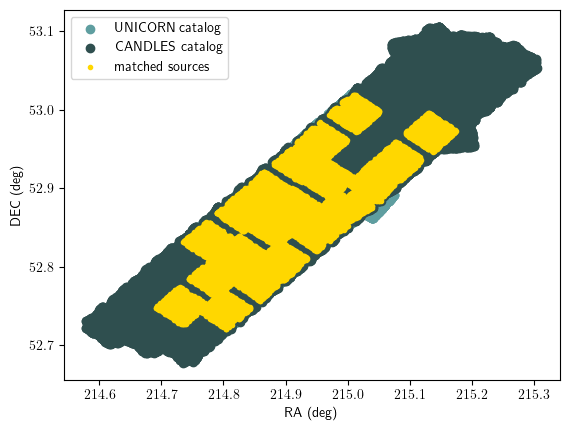

In [16]:
plt.figure()
plt.scatter(RA_UNICORN, DEC_UNICORN, label = 'UNICORN catalog', color='cadetblue')
plt.scatter(RA_CANDLES, DEC_CANDLES, label = 'CANDLES catalog',color='darkslategrey')
plt.scatter(matched_skycoord2.ra, matched_skycoord2.dec, label = 'matched sources', marker=".", color="gold")
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.legend()
plt.show()

### Creating a combined HST-CANDLES catalog 
* Unmatched sources --> Save from corresponding catalog
* Matched sources --> Save from UNICORN catalog

In [19]:
UNICORN_matched_df = UNICORN_catalog_df.iloc[matched_idx_skycoord1]
UNICORN_matched_df.reset_index(drop=True,inplace=True)
UNICORN_matched_df['PHOTOMETRIC_CATALOG'] = ['UNICORN'] * len(UNICORN_matched_df)
UNICORN_matched_df.head()

,ID,RA,DEC,FLUX_F606W,FLUXERR_F606W,FLUX_F814W,FLUXERR_F814W,FLUX_F115W,FLUXERR_F115W,PHOTOMETRIC_CATALOG
0,29407,215.053309,52.884321,44.424869,20.512898,76.015923,18.222369,94.208974,9.500608,UNICORN
1,30823,215.040044,52.875199,2.506675,3.284322,-0.273265,3.081288,0.190361,1.509306,UNICORN
2,29363,215.050636,52.883443,179.588342,12.671615,168.580504,12.141619,281.622755,6.605259,UNICORN
3,29366,215.052971,52.884882,659.959138,16.387891,710.668272,17.262834,983.017916,10.183260,UNICORN
4,29336,215.038039,52.875145,42.102241,10.548285,53.512940,8.599339,62.744183,5.602495,UNICORN


In [21]:
CANDLES_matched_df = CANDLES_catalog_df.iloc[matched_idx_skycoord2]
CANDLES_matched_df.reset_index(drop=True,inplace=True)
CANDLES_matched_df['PHOTOMETRIC_CATALOG'] = ['CANDLES'] * len(CANDLES_matched_df)
CANDLES_matched_df.head()

,ID,RA,DEC,FLUX_F606W,FLUXERR_F606W,FLUX_F814W,FLUXERR_F814W,FLUX_F125W,FLUXERR_F125W,PHOTOMETRIC_CATALOG
0,1013,215.053293,52.884326,4.576812,11.179655,15.900344,11.027515,25.731202,36.871374,CANDLES
1,1054,215.040051,52.875228,15.608726,21.489897,52.167228,22.149218,251.581476,52.592704,CANDLES
2,1156,215.050617,52.883460,156.105017,13.397112,159.724763,13.129627,258.503244,28.970544,CANDLES
3,1241,215.052972,52.884864,777.720837,21.274931,861.153851,22.218488,1263.270050,46.626136,CANDLES
4,1258,215.038022,52.875160,11.271867,4.720471,11.608047,4.580151,25.966973,8.893584,CANDLES


In [23]:
# Step 1: Create CANDLES_unmatched_df
CANDLES_unmatched_df = CANDLES_catalog_df.merge(CANDLES_matched_df, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
#print(len(CANDLES_unmatched_df),'CANDLES unmatched sources')
CANDLES_unmatched_df['PHOTOMETRIC_CATALOG'] = ['CANDLES'] * len(CANDLES_unmatched_df)

# Step 2: Create HST_unmatched_df
UNICORN_unmatched_df = UNICORN_catalog_df.merge(UNICORN_matched_df, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
#print(len(HST_unmatched_df),'HST unmatched sources')
UNICORN_unmatched_df['PHOTOMETRIC_CATALOG'] = ['UNICORN'] * len(UNICORN_unmatched_df)

# Step 3: Combine the dataframes into a single dataframe
UNICORN_CANDLES_catalog_df = pd.concat([CANDLES_unmatched_df, UNICORN_unmatched_df, UNICORN_matched_df], ignore_index=True)
print(len(UNICORN_CANDLES_catalog_df),'UNICORN-CANDLES sources to match with my NIRSpec sample')
UNICORN_CANDLES_catalog_df.head()

160163 UNICORN-CANDLES sources to match with my NIRSpec sample


,ID,RA,DEC,FLUX_F606W,FLUXERR_F606W,FLUX_F814W,FLUXERR_F814W,FLUX_F125W,FLUXERR_F125W,PHOTOMETRIC_CATALOG,FLUX_F115W,FLUXERR_F115W
0,1,215.203681,52.954234,0.000002,1.123111e+13,3.369499,23.160108,11.524700,18.528576,CANDLES,NaN,NaN
1,2,215.202841,52.954928,-0.000014,1.523260e+13,92.983421,26.907546,207.192761,40.708158,CANDLES,NaN,NaN
2,3,215.202612,52.955188,-0.000002,7.223369e+12,70.613957,12.497244,67.009576,15.056486,CANDLES,NaN,NaN
3,4,215.203345,52.955809,-0.000005,1.222719e+13,134.364287,29.122775,212.618028,18.905804,CANDLES,NaN,NaN
4,5,215.202414,52.954539,-0.000041,1.155289e+13,2314.556415,23.038111,3153.665781,22.554740,CANDLES,NaN,NaN


### Cross matching JWST and UNICRON-CANDLES catalogs with skycoords

In [25]:
RA_NIRSpec = NIRSpec_sample_df['RA']
DEC_NIRSpec = NIRSpec_sample_df['DEC']

RA_UNICORN_CANDLES = UNICORN_CANDLES_catalog_df['RA']
DEC_UNICORN_CANDLES = UNICORN_CANDLES_catalog_df['DEC']

In [26]:
# using skycoord to find the closest match
skycoord1 = SkyCoord(ra = RA_UNICORN_CANDLES, dec = DEC_UNICORN_CANDLES, unit = 'degree')
skycoord2 = SkyCoord(ra = RA_NIRSpec, dec = DEC_NIRSpec, unit = 'degree')
idx2 = np.arange(0,len(RA_NIRSpec))   # initializing index list for JWST catalog

# need to match the smallest catalog (my JWST sample) to the larger one (CANDLES catalog)
# returns the index in skycoord 1 that is the closest match to the entry in skycoord2, the 2d separation on the sky, 
# and the physical 3d distance but for it to be accurate we need the redshift
idx1, sep2d, sep3d = skycoord2.match_to_catalog_sky(skycoord1)

# converting sep2d from degrees to arcseconds
sep_mask = sep2d.arcsec < 0.4 # want separation to be less than 0.3 arcseconds

# apply indexes to subselect only those in skycoord 2 that met the criteria
matched_idx_skycoord2 = idx2[sep_mask]
matched_skycoord2 = skycoord2[sep_mask]

# apply indexes to subselect only those in skycoord 1 that met the criteria
matched_idx_skycoord1 = idx1[sep_mask]
matched_skycoord1 = skycoord1[matched_idx_skycoord1]

# applied mask to the separation
matched_sep = sep2d[sep_mask]

print(len(matched_skycoord1),'sources')
'''
print('All the close matches between the two catalogs')
for sky1, sky2, sep in zip(matched_skycoord1, matched_skycoord2, matched_sep.arcsec):
    
    print(f'{sky1.ra:.3f}, {sky1.dec:.3f} -------- {sky2.ra:.3f}, {sky2.dec:.3f}--------- {sep}')
'''

128 sources


"\nprint('All the close matches between the two catalogs')\nfor sky1, sky2, sep in zip(matched_skycoord1, matched_skycoord2, matched_sep.arcsec):\n    \n    print(f'{sky1.ra:.3f}, {sky1.dec:.3f} -------- {sky2.ra:.3f}, {sky2.dec:.3f}--------- {sep}')\n"

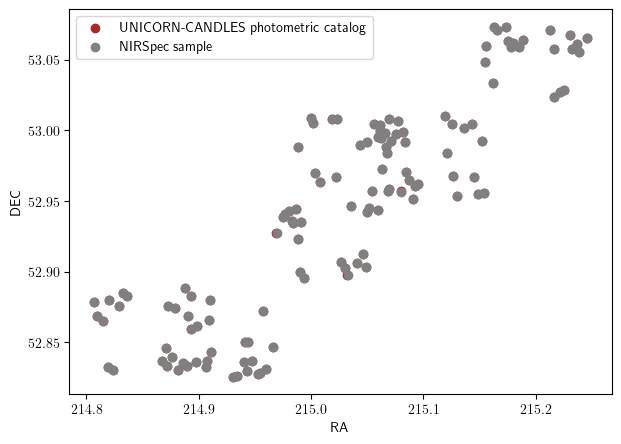

In [27]:
plt.figure(figsize = (7, 5))
plt.scatter(matched_skycoord1.ra, matched_skycoord1.dec,color='brown',label = 'UNICORN-CANDLES photometric catalog')
plt.scatter(matched_skycoord2.ra, matched_skycoord2.dec,color='grey',label = 'NIRSpec sample')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend()
plt.show()

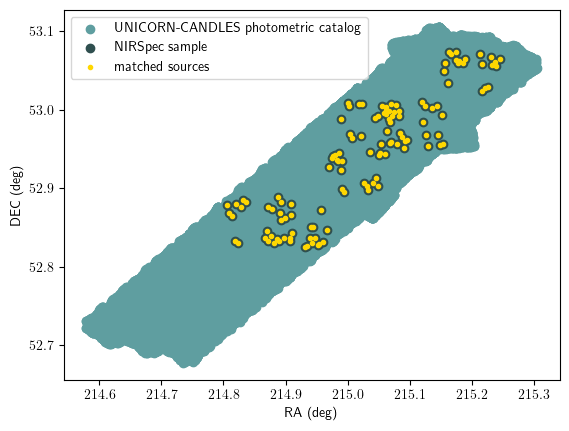

In [28]:
plt.figure()
plt.scatter(RA_UNICORN_CANDLES, DEC_UNICORN_CANDLES, label = 'UNICORN-CANDLES photometric catalog', color='cadetblue')
plt.scatter(RA_NIRSpec, DEC_NIRSpec, label = 'NIRSpec sample',color='darkslategrey')
plt.scatter(matched_skycoord2.ra, matched_skycoord2.dec, label = 'matched sources', marker=".", color="gold")
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.legend()
plt.savefig('crossmatch.png',dpi=500)
plt.show()

### Creating matched dataframes

In [30]:
UNICORN_CANDLES_matched_df = UNICORN_CANDLES_catalog_df.iloc[matched_idx_skycoord1]
UNICORN_CANDLES_matched_df.reset_index(drop=True,inplace=True)
UNICORN_CANDLES_matched_df

,ID,RA,DEC,FLUX_F606W,FLUXERR_F606W,FLUX_F814W,FLUXERR_F814W,FLUX_F125W,FLUXERR_F125W,PHOTOMETRIC_CATALOG,FLUX_F115W,FLUXERR_F115W
0,8308,214.872558,52.875950,-0.441309,2.855104,9.971317,3.151450,NaN,NaN,UNICORN,27.220230,2.356362
1,215,214.806486,52.878826,-5.317261,4.884877,14.221966,7.453855,NaN,NaN,UNICORN,57.730447,3.766324
2,1581,214.819667,52.879755,-7.994864,6.667079,19.532707,8.693782,NaN,NaN,UNICORN,23.126144,4.297933
3,82714,214.832185,52.885083,-1.536648,3.685241,0.239812,5.340128,NaN,NaN,UNICORN,16.001583,3.188793
4,3053,214.836197,52.882692,8.391678,6.538534,59.418712,9.331446,NaN,NaN,UNICORN,306.546773,6.497619
...,...,...,...,...,...,...,...,...,...,...,...,...
123,32792,215.066472,52.988610,160.463877,10.118988,252.849223,13.490673,483.493425,24.323530,CANDLES,NaN,NaN
124,25062,215.069891,53.007981,139.078843,17.575801,180.101071,22.651318,507.545819,33.893851,CANDLES,NaN,NaN
125,28557,215.043571,52.989918,48.567372,7.015054,59.151769,9.777851,89.749603,11.371183,CANDLES,NaN,NaN
126,10334,214.930912,52.825748,27.008446,8.144561,19.365088,8.199476,20.585842,13.138537,CANDLES,NaN,NaN


In [31]:
NIRSpec_matched_df = NIRSpec_sample_df.iloc[matched_idx_skycoord2]
NIRSpec_matched_df.reset_index(drop=True,inplace=True) 
NIRSpec_matched_df

,ID,REDSHIFT,RA,DEC,H-ALPHA INTEGRATED LUMINOSITY,H-ALPHA INTEGRATED LUMINOSITY MEAN ERROR,H-ALPHA INTEGRATED LUMINOSITY 16% ERROR,H-ALPHA INTEGRATED LUMINOSITY 84% ERROR,H-BETA INTEGRATED LUMINOSITY,H-BETA INTEGRATED LUMINOSITY MEAN ERROR,H-BETA INTEGRATED LUMINOSITY 16% ERROR,H-BETA INTEGRATED LUMINOSITY 84% ERROR,H-ALPHA INTEGRATED FLUX,H-ALPHA INTEGRATED FLUX MEAN ERROR,H-ALPHA INTEGRATED FLUX 16% ERROR,H-ALPHA INTEGRATED FLUX 84% ERROR,H-BETA INTEGRATED FLUX,H-BETA INTEGRATED FLUX MEAN ERROR,H-BETA INTEGRATED FLUX 16% ERROR,H-BETA INTEGRATED FLUX 84% ERROR
0,323,5.667781,214.872556,52.875949,2.590378e+42,2.012511e+41,6.623902e+41,8.483472e+41,1.152682e+42,3.032117e+39,8.083432e+40,8.399957e+40,7.106306e-18,5.521016e-19,1.817166e-18,2.327311e-18,3.162208e-18,8.318148e-21,2.217566e-19,2.304400e-19
1,355,6.100327,214.806482,52.878827,2.227345e+42,2.334405e+39,1.190380e+41,1.150471e+41,6.915973e+41,1.608721e+39,7.122139e+40,7.016355e+40,5.150018e-18,5.397559e-21,2.752371e-19,2.660095e-19,1.599096e-18,3.719649e-21,1.646765e-19,1.622306e-19
2,381,5.505045,214.819671,52.879755,1.216074e+42,3.209706e+39,1.076674e+41,1.127209e+41,8.614089e+40,1.311409e+40,4.704416e+40,7.231495e+40,3.570494e-18,9.423958e-21,3.161203e-19,3.309578e-19,2.529167e-19,3.850405e-20,1.381255e-19,2.123226e-19
3,386,6.612528,214.832184,52.885083,1.241948e+42,4.426539e+39,1.435680e+41,1.515168e+41,2.770874e+41,2.620224e+40,1.240500e+41,1.756645e+41,2.382386e-18,8.491280e-21,2.754017e-19,2.906495e-19,5.315274e-19,5.026288e-20,2.379610e-19,3.369712e-19
4,397,6.000576,214.836197,52.882693,1.080890e+43,1.538812e+39,2.141968e+41,2.112040e+41,3.908151e+42,7.856717e+38,1.299206e+41,1.300456e+41,2.596735e-17,3.696847e-21,5.145871e-19,5.073972e-19,9.388957e-18,1.887501e-21,3.121217e-19,3.124219e-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,29756,1.239912,215.066484,52.988621,3.028216e+40,1.257250e+38,4.056832e+39,4.150702e+39,8.770802e+39,7.995087e+38,3.182483e+39,4.482350e+39,3.229312e-18,1.340741e-20,4.326236e-19,4.426340e-19,9.353249e-19,8.526022e-20,3.393824e-19,4.780012e-19
124,31057,1.621038,215.069889,53.007982,8.263794e+40,9.023853e+37,5.289918e+39,5.461673e+39,2.860636e+40,1.227927e+39,9.430322e+39,1.134240e+40,4.555514e-18,4.974505e-21,2.916130e-19,3.010812e-19,1.576959e-18,6.769095e-20,5.198577e-19,6.252634e-19
125,31075,1.283137,215.043555,52.989917,3.276332e+41,6.945467e+38,1.099033e+40,1.047340e+40,1.098853e+41,2.347219e+38,7.169133e+39,7.109135e+39,3.210839e-17,6.806629e-20,1.077064e-18,1.026404e-18,1.076887e-17,2.300299e-20,7.025824e-19,6.967026e-19
126,36119,1.911995,214.930920,52.825752,5.507181e+40,3.390945e+39,1.479400e+40,1.797803e+40,3.073228e+40,5.167619e+38,9.936566e+39,1.089619e+40,2.025888e-18,1.247403e-19,5.442165e-19,6.613450e-19,1.130527e-18,1.900975e-20,3.655294e-19,4.008304e-19


### Measuring UV continuum

In [34]:
'''
def luminosity_density(flux_freq,flux_freq_err,z_val):
    # converts flux density per unit freq in the observed frame at a redshift 
    # into the luminosity density per unit freq in the rest frame

    # args:
    #     flux_freq (float): flux density per unit frequency [Jy] --> [erg/cm^2/s/Hz] in observed frame
    #     z_val (float): redshift of source

    # returns (float): luminosity density per unit freq [ergs/(s*Hz)] in rest frame
    
    flux_freq = (10**-23)*flux_freq         # [Jy] --> [erg/cm^2/s/Hz]
    flux_freq_err = (10**-23)*flux_freq_err # [Jy] --> [erg/cm^2/s/Hz]
    
    lum_dist = cosmo.luminosity_distance(z_val).to(u.cm).value
    
    lum_freq = (4*np.pi*(lum_dist**2) / (1+z_val)) * flux_freq
    lum_freq_err = (4*np.pi*(lum_dist**2) / (1+z_val)) * flux_freq_err
    return lum_freq, lum_freq_err
'''

def luminosity_density(flux_freq,flux_freq_err,z_val):
    '''
    converts flux density per unit freq at a redshift into the luminosity density per unit freq
    then multiplies this by the frequency equivalent of 1500 A (where the observation is made)

    args:
        flux_freq (float): flux density per unit frequency [Jy] --> [erg/cm^2/s/Hz] in observed frame
        z_val (float): redshift of source

    returns (float): luminosity density per unit freq [ergs/s]
    '''
    flux_freq = (10**-23)*flux_freq         # [Jy] --> [erg/cm^2/s/Hz]
    flux_freq_err = (10**-23)*flux_freq_err # [Jy] --> [erg/cm^2/s/Hz]

    # luminosity density per unit frequency
    lum_dist = cosmo.luminosity_distance(z_val).to(u.cm).value
    
    lum_freq = (4*np.pi*(lum_dist**2)) * flux_freq         # [erg/cm^2/s/Hz] --> [erg/s/Hz]
    lum_freq_err = (4*np.pi*(lum_dist**2)) * flux_freq_err # [erg/cm^2/s/Hz] --> [erg/s/Hz]

    # multiplying frequency of observation (equivalent of 1500 A) times luminosity density per unit frequency
    c = 2.99792458e18 # [A/s]
    
    lum_freq = (c/1500) * lum_freq           # [erg/s/Hz] --> [erg/s]
    lum_freq_err = (c/1500) * lum_freq_err   # [erg/s/Hz] --> [erg/s]
    
    return lum_freq, lum_freq_err

def reddening(Ha_integ_flux_obs, Hb_integ_flux_obs):
    '''
    Eq (3) and (4) from Calzetti 2001 
    
    args:
        Ha_integ_flux_obs (float): observed integrated line flux of Ha emission line
        Hb_integ_flux_obs (float): observed integrated line flux of Hb emission line

    returns (float): E(B-V) reddening of source
    '''
    # intrinsic ratio and differential extinction between the two wavelengths
    Ha_Hb_intrinsic_lum_ratio = 2.87
    Ha_Hb_extinction = 1.163
    R_factor = Ha_Hb_intrinsic_lum_ratio / (Ha_integ_flux_obs / Hb_integ_flux_obs)
    reddening = np.log10(R_factor) / (0.4*Ha_Hb_extinction)
    return reddening

def dust_correction_UV_continuum(Ha_integ_flux_obs, Hb_integ_flux_obs, UV_lum_density_restframe, filter_eff_restframe_wavs):
    '''
    Eq (7), (8a), and (8b) from Calzetti 2001 
    calls reddening function defined above

    args:
        Ha_integ_flux_obs (float): observed integrated line flux of Ha emission line [erg/(s*cm^2)]
        Hb_integ_flux_obs (float): observed integrated line flux of Hb emission line [erg/(s*cm^2)]
        UV_lum_density_restframe (float): observed UV continuum luminosity density per unit freq, rest-frame [ergs/(s*Hz)]
        filter_eff_restframe_wavs (float): rest-frame effective wavelength of selected HST/JWST filters for UV continuum measurement [A]

    returns (tuple): dust corrected luminosity density for UV continuum [ergs/(s*Hz)]
    '''
    
    k_UV = np.piecewise(filter_eff_restframe_wavs,
                        [(filter_eff_restframe_wavs >= 0.63 and filter_eff_restframe_wavs <= 2.20),(filter_eff_restframe_wavs >= 0.12 and filter_eff_restframe_wavs <= 0.63)],
                        [lambda x: 1.17*(-1.857+(1.040/filter_eff_restframe_wavs))+1.78,
                         lambda x: 1.17*(-2.156+(1.509/filter_eff_restframe_wavs)-(0.198/(filter_eff_restframe_wavs**2))+(0.011/(filter_eff_restframe_wavs**3)))+1.78])
    
    power_UV = 0.4*reddening(Ha_integ_flux_obs, Hb_integ_flux_obs)*k_UV
    UV_lum_density_restframe_corr = UV_lum_density_restframe*(10**power_UV)
    return UV_lum_density_restframe_corr

def UV_measurement_filter(UV_filters_df, source, z_val):
    '''
    Decides what HST filter should be used for UV continuum measurement of a given galaxy (dependent upon redshift)
    conventionally taking UV continuum at 1500 angstroms. For HST CEERS, flux denisty is reported in nJy. 
    This function converts all fluxes from nJy to Jy in the return functions !!

    args:
        UV_filters_df (dataframe): photometric filter dataframe
        source (int): source index within dataframe
        z_val (float): redshift of source
    
    returns (tuple): flux per unit frequency, associated error, and effective wavelength of filter
    '''
    UV_rest = 1500 # [A]
    UV_obs = UV_rest*(1+z_val)

    # effective wavelength of selected HST/JWST filters 
    F606W = 5809.26 # [A]   HST filter
    F814W = 7973.39 # [A]   HST filter
    F115W = 11433.62 # [A]  JWST filter for UNICRON catalog
    # F105W = 10430.83 # [A]  HST filter for CANDLES catalog
    F125W = 12363.55 # [A]  HST filter for CANDLES catalog

    # wavelength range of selected HST filters
    F606W_min = 4634.30 # [A]
    F606W_max = 7180.10 # [A]
    
    F814W_min = 6869.59 # [A]
    F814W_max = 9632.01 # [A]
    
    # F105W_min = 8955.24 # [A]  # replaced this filter with F115W since it had few observations for my sources
    # F105W_max = 12130.55 # [A]
    
    # F115W_min = 9975          # synthetically moved filter range (minimum) since there was a gap
    F115W_min = 9632.01 # [A]
    F115W_max = 13058   # [A]

    # for sources covered by CANDLES catalog
    # F125W_min = 10853.22      # synthetically moved filter range (minimum) since there was a gap
    F125W_min = 9632.01 # [A]
    F125W_max = 14141.73 # [A]

    # avg if in between two filters
    # conditions to check
    cond_F606W = F606W_min < UV_obs < F606W_max
    cond_F814W = F814W_min < UV_obs < F814W_max
    cond_F115W = F115W_min < UV_obs < F115W_max
    # cond_F105W = F105W_min < UV_obs < F105W_max
    cond_F125W = F125W_min < UV_obs < F125W_max

    # checking which catalog
    if UV_filters_df['PHOTOMETRIC_CATALOG'][source] == 'CANDLES':
    
        if (UV_obs < F606W_min) or (cond_F606W):
            # checking if obs UV is in between two filters
            if (cond_F814W):
                # taking avg flux for both filters
                avg_flux_freq = np.mean([UV_filters_df['FLUX_F606W'].values[source],UV_filters_df['FLUX_F814W'].values[source]])
                avg_flux_freq_err = np.mean([UV_filters_df['FLUXERR_F606W'].values[source],UV_filters_df['FLUXERR_F814W'].values[source]])

                if avg_flux_freq_err >= avg_flux_freq:
                    high_err = 'Y'
    
                else:
                    high_err = 'N'
                    
                return (avg_flux_freq * 10**-9), (avg_flux_freq_err * 10**-9), (np.mean([F606W,F814W])), 'F606W & F814W', high_err # converted [nJy] to [Jy]
            
            # otherwise, taking flux of filter
            flux_freq = UV_filters_df['FLUX_F606W'].values[source]
            flux_freq_err = UV_filters_df['FLUXERR_F606W'].values[source]

            if flux_freq_err >= flux_freq:
                high_err = 'Y'

            else:
                high_err = 'N'
            
            return (flux_freq * 10**-9), (flux_freq_err * 10**-9), F606W, 'F606W', high_err    # converted [nJy] to [Jy]
            
        elif (cond_F814W):
            # checking if obs UV is in between two filters
            if (cond_F125W):
                # taking avg flux for both filters
                avg_flux_freq = np.mean([UV_filters_df['FLUX_F814W'].values[source],UV_filters_df['FLUX_F125W'].values[source]])
                avg_flux_freq_err = np.mean([UV_filters_df['FLUXERR_F814W'].values[source],UV_filters_df['FLUXERR_F125W'].values[source]])

                if avg_flux_freq_err >= avg_flux_freq:
                    high_err = 'Y'
    
                else:
                    high_err = 'N'
                
                return (avg_flux_freq * 10**-9), (avg_flux_freq_err * 10**-9), (np.mean([F814W,F125W])), 'F814W & F125W', high_err # converted [nJy] to [Jy]
            
            # otherwise, taking flux of filter
            flux_freq = UV_filters_df['FLUX_F814W'].values[source]
            flux_freq_err = UV_filters_df['FLUXERR_F814W'].values[source]

            if flux_freq_err >= flux_freq:
                high_err = 'Y'

            else:
                high_err = 'N'
            
            return (flux_freq * 10**-9), (flux_freq_err * 10**-9), F814W, 'F814W', high_err # converted [nJy] to [Jy]
            
        elif (cond_F125W):
            flux_freq = UV_filters_df['FLUX_F125W'].values[source]
            flux_freq_err = UV_filters_df['FLUXERR_F125W'].values[source]

            if flux_freq_err >= flux_freq:
                high_err = 'Y'

            else:
                high_err = 'N'
            
            return (flux_freq * 10**-9) , (flux_freq_err * 10**-9), F125W, 'F125W', high_err # converted [nJy] to [Jy]
            
        else:
            # source not within filter ranges
            return None, None, None

    # checking which catalog
    elif UV_filters_df['PHOTOMETRIC_CATALOG'][source] == 'UNICORN':
    
        if (UV_obs < F606W_min) or (cond_F606W):
            # checking if obs UV is in between two filters
            if (cond_F814W):
                # taking avg flux for both filters
                avg_flux_freq = np.mean([UV_filters_df['FLUX_F606W'].values[source],UV_filters_df['FLUX_F814W'].values[source]])
                avg_flux_freq_err = np.mean([UV_filters_df['FLUXERR_F606W'].values[source],UV_filters_df['FLUXERR_F814W'].values[source]])

                if avg_flux_freq_err >= avg_flux_freq:
                    high_err = 'Y'
    
                else:
                    high_err = 'N'
                
                return (avg_flux_freq * 10**-9), (avg_flux_freq_err * 10**-9), (np.mean([F606W,F814W])), 'F606W & F814W', high_err # converted [nJy] to [Jy]
            
            # otherwise, taking flux of filter
            flux_freq = UV_filters_df['FLUX_F606W'].values[source]
            flux_freq_err = UV_filters_df['FLUXERR_F606W'].values[source]

            if flux_freq_err >= flux_freq:
                high_err = 'Y'

            else:
                high_err = 'N'
            
            return (flux_freq * 10**-9), (flux_freq_err * 10**-9), F606W, 'F606W', high_err    # converted [nJy] to [Jy]
            
        elif (cond_F814W):
            # checking if obs UV is in between two filters
            if (cond_F115W):
                # taking avg flux for both filters
                avg_flux_freq = np.mean([UV_filters_df['FLUX_F814W'].values[source],UV_filters_df['FLUX_F115W'].values[source]])
                avg_flux_freq_err = np.mean([UV_filters_df['FLUXERR_F814W'].values[source],UV_filters_df['FLUXERR_F115W'].values[source]])

                if avg_flux_freq_err >= avg_flux_freq:
                    high_err = 'Y'

                else:
                    high_err = 'N'
                
                return (avg_flux_freq * 10**-9), (avg_flux_freq_err * 10**-9), (np.mean([F814W,F115W])), 'F814W & F115W', high_err # converted [nJy] to [Jy]
            
            # otherwise, taking flux of filter
            flux_freq = UV_filters_df['FLUX_F814W'].values[source]
            flux_freq_err = UV_filters_df['FLUXERR_F814W'].values[source]

            if flux_freq_err >= flux_freq:
                high_err = 'Y'

            else:
                high_err = 'N'
            
            return (flux_freq * 10**-9), (flux_freq_err * 10**-9), F814W, 'F814W', high_err # converted [nJy] to [Jy]
            
        elif (cond_F115W):
            flux_freq = UV_filters_df['FLUX_F115W'].values[source]
            flux_freq_err = UV_filters_df['FLUXERR_F115W'].values[source]

            if flux_freq_err >= flux_freq:
                high_err = 'Y'

            else:
                high_err = 'N'
            
            return (flux_freq * 10**-9) , (flux_freq_err * 10**-9), F115W, 'F115W', high_err # converted [nJy] to [Jy]
            
        else:
            # source not within filter ranges
            return None, None, None

In [36]:
UV_lum_densities = []
UV_lum_densities_err = []
photometric_filter_info = []
high_error_info = []
for source, z_val in enumerate(NIRSpec_matched_df['REDSHIFT'].values):

    # calculating observed UV flux per unit frequency and obtaining filter effective wavelength
    # unit of flux --> [Jy]
    UV_flux_density, UV_flux_density_err, filter_eff_wav, filter_str, err_string = UV_measurement_filter(UNICORN_CANDLES_matched_df, source, z_val)

    # creating string with photometric filter info
    filter_info = str(UNICORN_CANDLES_matched_df['PHOTOMETRIC_CATALOG'][source]) + ' ' + str(filter_str)
    
    # converting effective filter wavelength to restframe
    filter_eff_restframe_wav = filter_eff_wav / (1+z_val)  

    # calculating UV luminosity per unit frequency in restframe using observed UV flux density
    # unit of lum --> [[ergs/(s*Hz)]]
    UV_lum_density, UV_lum_density_err = luminosity_density(UV_flux_density, UV_flux_density_err, z_val)
    
    # intrinsic (dust-corrected) UV luminosity per unit frequency in restframe
    UV_lum_density_corr = dust_correction_UV_continuum(NIRSpec_matched_df['H-ALPHA INTEGRATED FLUX'][source],NIRSpec_matched_df['H-BETA INTEGRATED FLUX'][source],UV_lum_density,filter_eff_restframe_wav)
    UV_lum_density_corr_err = dust_correction_UV_continuum(NIRSpec_matched_df['H-ALPHA INTEGRATED FLUX MEAN ERROR'][source],NIRSpec_matched_df['H-BETA INTEGRATED FLUX MEAN ERROR'][source],UV_lum_density_err,filter_eff_restframe_wav)

    UV_lum_densities.append(UV_lum_density_corr)
    UV_lum_densities_err.append(UV_lum_density_corr_err)
    photometric_filter_info.append(filter_info)
    high_error_info.append(err_string)

In [38]:
# updating table
NIRSpec_matched_df = NIRSpec_matched_df.rename(columns={'ID': 'NIRSpec_ID'}) # specifying ID type
NIRSpec_matched_df.insert(4, 'PHOTOMETRIC CATALOG', photometric_filter_info)
NIRSpec_matched_df.insert(5, 'UV LUMINOSITY DENSITY REST-FRAME', UV_lum_densities)
NIRSpec_matched_df.insert(6, 'UV LUMINOSITY DENSITY REST-FRAME ERROR', UV_lum_densities_err)
NIRSpec_matched_df.to_csv('sample_Balmer_UV.csv',index=False)
NIRSpec_matched_df

,NIRSpec_ID,REDSHIFT,RA,DEC,PHOTOMETRIC CATALOG,UV LUMINOSITY DENSITY REST-FRAME,UV LUMINOSITY DENSITY REST-FRAME ERROR,H-ALPHA INTEGRATED LUMINOSITY,H-ALPHA INTEGRATED LUMINOSITY MEAN ERROR,H-ALPHA INTEGRATED LUMINOSITY 16% ERROR,...,H-BETA INTEGRATED LUMINOSITY 16% ERROR,H-BETA INTEGRATED LUMINOSITY 84% ERROR,H-ALPHA INTEGRATED FLUX,H-ALPHA INTEGRATED FLUX MEAN ERROR,H-ALPHA INTEGRATED FLUX 16% ERROR,H-ALPHA INTEGRATED FLUX 84% ERROR,H-BETA INTEGRATED FLUX,H-BETA INTEGRATED FLUX MEAN ERROR,H-BETA INTEGRATED FLUX 16% ERROR,H-BETA INTEGRATED FLUX 84% ERROR
0,323,5.667781,214.872556,52.875949,UNICORN F115W,1.983081e+44,1.716686e+43,2.590378e+42,2.012511e+41,6.623902e+41,...,8.083432e+40,8.399957e+40,7.106306e-18,5.521016e-19,1.817166e-18,2.327311e-18,3.162208e-18,8.318148e-21,2.217566e-19,2.304400e-19
1,355,6.100327,214.806482,52.878827,UNICORN F115W,4.990144e+44,3.255561e+43,2.227345e+42,2.334405e+39,1.190380e+41,...,7.122139e+40,7.016355e+40,5.150018e-18,5.397559e-21,2.752371e-19,2.660095e-19,1.599096e-18,3.719649e-21,1.646765e-19,1.622306e-19
2,381,5.505045,214.819671,52.879755,UNICORN F115W,1.574217e+44,2.925641e+43,1.216074e+42,3.209706e+39,1.076674e+41,...,4.704416e+40,7.231495e+40,3.570494e-18,9.423958e-21,3.161203e-19,3.309578e-19,2.529167e-19,3.850405e-20,1.381255e-19,2.123226e-19
3,386,6.612528,214.832184,52.885083,UNICORN F115W,1.667184e+44,3.322362e+43,1.241948e+42,4.426539e+39,1.435680e+41,...,1.240500e+41,1.756645e+41,2.382386e-18,8.491280e-21,2.754017e-19,2.906495e-19,5.315274e-19,5.026288e-20,2.379610e-19,3.369712e-19
4,397,6.000576,214.836197,52.882693,UNICORN F115W,2.550235e+45,5.405522e+43,1.080890e+43,1.538812e+39,2.141968e+41,...,1.299206e+41,1.300456e+41,2.596735e-17,3.696847e-21,5.145871e-19,5.073972e-19,9.388957e-18,1.887501e-21,3.121217e-19,3.124219e-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,29756,1.239912,215.066484,52.988621,CANDLES F606W,3.007347e+43,1.896458e+42,3.028216e+40,1.257250e+38,4.056832e+39,...,3.182483e+39,4.482350e+39,3.229312e-18,1.340741e-20,4.326236e-19,4.426340e-19,9.353249e-19,8.526022e-20,3.393824e-19,4.780012e-19
124,31057,1.621038,215.069889,53.007982,CANDLES F606W,5.042346e+43,6.372160e+42,8.263794e+40,9.023853e+37,5.289918e+39,...,9.430322e+39,1.134240e+40,4.555514e-18,4.974505e-21,2.916130e-19,3.010812e-19,1.576959e-18,6.769095e-20,5.198577e-19,6.252634e-19
125,31075,1.283137,215.043555,52.989917,CANDLES F606W,9.904747e+42,1.430638e+42,3.276332e+41,6.945467e+38,1.099033e+40,...,7.169133e+39,7.109135e+39,3.210839e-17,6.806629e-20,1.077064e-18,1.026404e-18,1.076887e-17,2.300299e-20,7.025824e-19,6.967026e-19
126,36119,1.911995,214.930920,52.825752,CANDLES F606W,1.467381e+43,4.424978e+42,5.507181e+40,3.390945e+39,1.479400e+40,...,9.936566e+39,1.089619e+40,2.025888e-18,1.247403e-19,5.442165e-19,6.613450e-19,1.130527e-18,1.900975e-20,3.655294e-19,4.008304e-19


In [40]:
# another table to look at
UV_vals_check_df = pd.DataFrame()
UV_vals_check_df['NIRSpec ID'] = NIRSpec_matched_df['NIRSpec_ID'] # specifying ID type
UV_vals_check_df['PHOTOMETRIC CATALOG'] = photometric_filter_info
UV_vals_check_df['UV LUMINOSITY DENSITY REST-FRAME'] = UV_lum_densities
UV_vals_check_df['UV LUMINOSITY DENSITY REST-FRAME ERROR'] = UV_lum_densities_err
UV_vals_check_df.to_csv('UV_vals_check_df.csv',index=False)
UV_vals_check_df[9:30]

,NIRSpec ID,PHOTOMETRIC CATALOG,UV LUMINOSITY DENSITY REST-FRAME,UV LUMINOSITY DENSITY REST-FRAME ERROR
9,618,UNICORN F115W,4.340279e+44,3.529645e+43
10,672,UNICORN F115W,8.330407e+43,1.747146e+43
11,746,UNICORN F115W,1.081021e+44,4.395181e+43
12,792,UNICORN F115W,2.471346e+44,4.455383e+43
13,1115,CANDLES F125W,5.817757e+44,1.070146e+44
14,1173,CANDLES F814W,8.552918e+44,8.336018e+43
15,1207,UNICORN F814W,7.776357e+44,4.335714e+43
16,1212,UNICORN F814W,7.098735e+44,3.881346e+43
17,1236,UNICORN F814W,4.057520e+44,2.982782e+43
18,1267,CANDLES F814W,2.668709e+44,4.190707e+43
